In [1]:
import numpy as np
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/simple_rnn.png", width=450, height=200)
#RNN은 입력값(x), 출력값(y), 상태값(state), 가중치(W), 편향값(b), 활성화함수(tanh)로 구성
import tensorflow as tf
inputs = np.array([
   [[1, 2]]
])
tf.set_random_seed(777)
tf_inputs = tf.constant(inputs, dtype=tf.float32)
rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=3)
outputs, state =tf.nn.dynamic_rnn(cell=rnn_cell, dtype=tf.float32, inputs=tf_inputs)
variables_names = [v.name for v in tf.trainable_variables()]

print(outputs)
print(state)
print("weight")
for   v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    print("output values")
    print(output_run)
    print("\nstate value")
    print(state_run)
    print("\nweights")
    values = sess.run(variables_names)
    for k, v in zip(variables_names, values):
        print(k, v)


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

Tensor("rnn/transpose_1:0", shape=(1, 1, 3), dtype=float32)
Tensor("rnn/while/Exit_3:0", shape=(1, 3), dtype=float32)
weight
<tf.Variable 'rnn/basic_rnn_cell/kernel:0' shape=(5, 3) dtype=float32_ref>
<tf.Variable 'rnn/basic_rnn_cell/bias:0' shape=(3,) dtype=float32_ref>
output values
[[[-0.5830231   0.04692652  0.50793856]]]

state value
[[-0.5830231   0.04692652  0.50793856]]

weights
rnn/basic_rnn_cell/kernel:0 [[-0.15391755 -0.29452556  0.79726106]
 [-0.2565564   0.17074329 -0.11865669]
 [-0.29650736  0.2189576   0.34588844]
 [ 0.48682088 -0.63733137 -0.00402939]
 [ 0.17477125  0.5573004   0.836376  ]]
rnn/basic_rnn_cell/bias:0 [0. 0. 0.]


In [2]:
# RNN셸이 한개일 경우, 출력값과 상태값이 동일
# 입력값이 1X2 행렬, 상태값은 1X3 행렬일때 가중치는 5개의 행을 가지며 , 편향값은 3개가 필요합니다.

# RNN으로 품사 구분 - 텐서플로우로 구현
# "I work at google", "I google at work"
# 문장은 토큰화 Text Vectorize.
#  I [1, 0, 0, 0], work[0, 1, 0, 0] , at [0, 0, 1, 0] , google [0, 0, 0, 1]
inputs = np.array([
  [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
  [[1, 0, 0, 0], [0, 0, 0, 1],[0, 1, 0, 0], [0, 0, 1, 0]]
])
tf.reset_default_graph()
tf.set_random_seed(777)
tf_inputs = tf.constant(inputs, dtype=tf.float32)
rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=3)
outputs, state =tf.nn.dynamic_rnn(cell=rnn_cell, dtype=tf.float32, inputs=tf_inputs)
variables_names = [v.name for v in tf.trainable_variables()]
print(outputs)
print(state)
print("weight")
for   v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    print("output values")
    print(output_run)
    print("\nstate value")
    print(state_run)
    print("\nweights")
    values = sess.run(variables_names)
    for k, v in zip(variables_names, values):
        print(k, v)

# 두 문장의 첫번째 단어의 출력값이 동일(이전 상태값이 존재하지 않기 때문)
# 두 문장의 두번째 단어부터 출력값은 다름(이전 상태값의 영향을 받아서)
#상태값은 마지막  단어의 출력값과 항상 동일하다.

Tensor("rnn/transpose_1:0", shape=(2, 4, 3), dtype=float32)
Tensor("rnn/while/Exit_3:0", shape=(2, 3), dtype=float32)
weight
<tf.Variable 'rnn/basic_rnn_cell/kernel:0' shape=(7, 3) dtype=float32_ref>
<tf.Variable 'rnn/basic_rnn_cell/bias:0' shape=(3,) dtype=float32_ref>
output values
[[[-0.13680483 -0.25750247  0.6126121 ]
  [-0.3471393   0.30684236  0.11040321]
  [-0.15108882  0.2794626   0.06153595]
  [ 0.50982815 -0.405139   -0.12335353]]

 [[-0.13680483 -0.25750247  0.6126121 ]
  [ 0.2937902  -0.38482246  0.21020025]
  [-0.3617702   0.18997     0.25569957]
  [-0.2074728   0.29115537  0.13282138]]]

state value
[[ 0.50982815 -0.405139   -0.12335353]
 [-0.2074728   0.29115537  0.13282138]]

weights
rnn/basic_rnn_cell/kernel:0 [[-0.13766801 -0.26343167  0.71309197]
 [-0.22947103  0.15271747 -0.10612977]
 [-0.26520425  0.19584167  0.30937207]
 [ 0.43542588 -0.57004654 -0.00360399]
 [ 0.15632015  0.4984647   0.7480774 ]
 [ 0.53016007  0.62955093 -0.12914163]
 [ 0.04111326  0.64419496  0

In [3]:
Image(url = "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/lstm_cell2.png", width=500, height=250)

LSTM의 출력값(y), 상태값(hidden state), 메모리 셸(memory cell)값 출력

In [9]:
#LSTM의 출력값(y), 상태값(hidden state), 메모리 셀(memory cell) 값 출력
tf.reset_default_graph()
tf.set_random_seed(777)
inputs = np.array([
   [[1, 0]]
])

tf_inputs = tf.constant(inputs, dtype=tf.float32)
lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=1) # hidden cell하고 hidden state , memory cell
outputs, state =tf.nn.dynamic_rnn(cell=lstm_cell, dtype=tf.float32, inputs=tf_inputs)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    _output, _state = sess.run([outputs, state]) # 인수로 넘겨줘서 실행
    print("output values")
    print(_output)
    print("\nstate value")
    print(_state.c)
    print("\nmemory cell value")
    print(_state.h) 
    

output values
[[[0.1147887]]]

state value
[[0.20332757]]

memory cell value
[[0.1147887]]


---
LSTM으로 문장 분류

In [10]:
import numpy as np
import pandas as pd

paragraph_dict_list = [
         {'paragraph': 'dishplace is located in sunnyvale downtown there is parking around the area but it can be difficult to find during peak business hours my sisters and i came to this place for dinner on a weekday they were really busy so i highly recommended making reservations unless you have the patience to wait', 'category': 'food'},
         {'paragraph': 'service can be slower during busy hours but our waiter was courteous and help gave some great entree recommendations', 'category': 'food'},
         {'paragraph': 'portions are huge both french toast and their various omelettes are really good their french toast is probably 1.5x more than other brunch places great place to visit if you are hungry and dont want to wait 1 hour for a table', 'category': 'food'},
         {'paragraph': 'we started with apps going the chicken and waffle slides and chicken nachos the sliders were amazing and the nachos were good too maybe by themselves the nachos would have scored better but after those sliders they were up against some tough competition', 'category': 'food'},
         {'paragraph': 'the biscuits and gravy was too salty two people in my group had the gravy and all thought it was too salty my hubby ordered a side of double egg and it was served on two small plates who serves eggs to one person on separate plates we commented on that when it was delivered and even the server laughed and said she doesnt know why the kitchen does that presentation of food is important and they really missed on this one', 'category': 'food'},
         {'paragraph': 'the garlic fries were a great starter (and a happy hour special) the pancakes looked and tasted great and were a fairly generous portion', 'category': 'food'},
         {'paragraph': 'our meal was excellent i had the pasta ai formaggi which was so rich i didnt dare eat it all although i certainly wanted to excellent flavors with a great texture contrast between the soft pasta and the crisp bread crumbs too much sauce for me but a wonderful dish', 'category': 'food'},
         {'paragraph': 'what i enjoy most about palo alto is so many restaurants have dog-friendly seating outside i had bookmarked italico from when they first opened about a 1.5 years ago and was jonesing for some pasta so time to finally knock that bookmark off', 'category': 'food'},
         {'paragraph': 'the drinks came out fairly quickly a good two to three minutes after the orders were taken i expected my iced tea to taste a bit more sweet but this was straight up green tea with ice in it not to complain of course but i was pleasantly surprised', 'category': 'food'},
         {'paragraph': 'despite the not so good burger the service was so slow the restaurant wasnt even half full and they took very long from the moment we got seated to the time we left it was almost 2 hours we thought that it would be quick since we ordered as soon as we sat down my coworkers did seem to enjoy their beef burgers for those who eat beef however i will not be returning it is too expensive and extremely slow service', 'category': 'food'},
    
         {'paragraph': 'the four reigning major champions simona halep caroline wozniacki angelique kerber and defending us open champion sloane stephens could make a case for being the quartet most likely to succeed especially as all but stephens has also enjoyed the no1 ranking within the last 14 months as they prepare for their gruelling new york campaigns they currently hold the top four places in the ranks', 'category': 'sports'},
         {'paragraph': 'the briton was seeded nn7 here last year before a slump in form and confidence took her down to no46 after five first-round losses but there have been signs of a turnaround including a victory over a sub-par serena williams in san jose plus wins against jelena ostapenko and victoria azarenka in montreal. konta pulled out of new haven this week with illness but will hope for good things where she first scored wins in a major before her big breakthroughs to the semis in australia and wimbledon', 'category': 'sports'},
         {'paragraph': 'stephens surged her way back from injury in stunning style to win her first major here last year?and ranked just no83 she has since proved what a big time player she is winning the miami title via four fellow major champions then reaching the final at the french open back on north american hard courts she ran to the final in montreal only just edged out by halep she has also avoided many of the big names in her quarter?except for wild card azarenka as a possible in the third round', 'category': 'sports'},
         {'paragraph': 'when it came to england chances in the world cup it would be fair to say that most fans had never been more pessimistic than they were this year after enduring years of truly dismal performances at major tournaments ? culminating in the 2014 event where they failed to win any of their three group games and finished in bottom spot those results led to the resignation of manager roy hodgson', 'category': 'sports'},
         {'paragraph': 'the team that eliminated russia ? croatia ? also improved enormously during the tournament before it began their odds were 33/1 but they played with real flair and star players like luka modric ivan rakitic and ivan perisic showed their quality on the world stage having displayed their potential by winning all three of their group stage games croatia went on to face difficult tests like the semi-final against england', 'category': 'sports'},
         {'paragraph': 'the perseyside outfit finished in fourth place in the premier league table and without a trophy last term after having reached the champions league final before losing to real madrid', 'category': 'sports'},
         {'paragraph': 'liverpool fc will return to premier league action on saturday lunchtime when they travel to leicester city in the top flight as they look to make it four wins in a row in the league', 'category': 'sports'},
         {'paragraph': 'alisson signed for liverpool fc from as roma this summer and the brazilian goalkeeper has helped the reds to keep three clean sheets in their first three premier league games', 'category': 'sports'},
         {'paragraph': 'but the rankings during that run-in to new york hid some very different undercurrents for murray had struggled with a hip injury since the clay swing and had not played a match since losing his quarter-final at wimbledon and he would pull out of the us open just two days before the tournament began?too late however to promote nederer to the no2 seeding', 'category': 'sports'},
         {'paragraph': 'then came the oh-so-familiar djokovic-nadal no-quarter-given battle for dominance in the third set there were exhilarating rallies with both chasing to the net both retrieving what looked like winning shots nadal more than once pulled off a reverse smash and had his chance to seal the tie-break but it was djokovic serving at 10-9 who dragged one decisive error from nadal for a two-sets lead', 'category': 'sports'}
]
df = pd.DataFrame(paragraph_dict_list)
df = df[['paragraph', 'category']]

print(df.head())
print(df.tail())

                                           paragraph category
0  dishplace is located in sunnyvale downtown the...     food
1  service can be slower during busy hours but ou...     food
2  portions are huge both french toast and their ...     food
3  we started with apps going the chicken and waf...     food
4  the biscuits and gravy was too salty two peopl...     food
                                            paragraph category
15  the perseyside outfit finished in fourth place...   sports
16  liverpool fc will return to premier league act...   sports
17  alisson signed for liverpool fc from as roma t...   sports
18  but the rankings during that run-in to new yor...   sports
19  then came the oh-so-familiar djokovic-nadal no...   sports


In [31]:
# 소문자 변화
# 단어에 대한 중복 제거 토큰화
# 텍스트 데이터 수치벡터로 전처리작업(인덱스, 단어)

results = set()  # set객체를 만든다
df['paragraph'].str.lower().str.split().apply(results.update) # 소문자, 토큰화, 
# .update : 데이터를 한꺼번에 갱신

# word2idx 로 딕셔너리를 생성 > 인덱스가 단어를 표현하는 숫자 역할을 함
# 단어를 인덱스로 표현
idx2word = dict(enumerate(results))
word2idx = {v:k for k, v in idx2word.items()}
print(word2idx["bread"])              #bread 단어의 인덱스 확인
print(word2idx["tournament"])      #tournament 단어의 인덱스 확인

# word2idx를 활용하여 모든 지문을 수치로 변환
def encode_paragraph(paragraph):
    words = paragraph.split(' ')
    encoded = []
    for word in words:
        encoded.append([word2idx[word]])

    return encoded

df['enc_paragraph'] = df.paragraph.apply(encode_paragraph)
print(df.head(2))

# 분류 항목 category를 수치로 변환(one hot encoding으로 변환)
def encode_category(category) :
    if category == "food" :
        return[1, 0]
    else:
        return[0, 1]
df["enc_category"] =df.category.apply(encode_category)
print(df.head())
print(df.tail())



189
428
                                           paragraph category  \
0  dishplace is located in sunnyvale downtown the...     food   
1  service can be slower during busy hours but ou...     food   

                                       enc_paragraph enc_category  seq_length  
0  [[492], [278], [115], [417], [479], [211], [51...       [1, 0]          53  
1  [[330], [77], [336], [333], [239], [384], [50]...       [1, 0]          19  
                                           paragraph category  \
0  dishplace is located in sunnyvale downtown the...     food   
1  service can be slower during busy hours but ou...     food   
2  portions are huge both french toast and their ...     food   
3  we started with apps going the chicken and waf...     food   
4  the biscuits and gravy was too salty two peopl...     food   

                                       enc_paragraph enc_category  seq_length  
0  [[492], [278], [115], [417], [479], [211], [51...       [1, 0]          53  
1  [[

In [32]:
# Dynamic RNN은 입력값의 길이를 고려하여 결과값을 출력
# 그래서 입력값의 길이를 알게 해줘야해
# Dynamic RNN이 각각 입력값의 길이(단어 수)를 알 수 있도록 문장별 단어수를 계산해서 열로 추가

def word_cnt(paragraph):
    return len(paragraph.split(' '))

df['seq_length'] = df.paragraph.apply(word_cnt)
print(df.head())


                                           paragraph category  \
0  dishplace is located in sunnyvale downtown the...     food   
1  service can be slower during busy hours but ou...     food   
2  portions are huge both french toast and their ...     food   
3  we started with apps going the chicken and waf...     food   
4  the biscuits and gravy was too salty two peopl...     food   

                                       enc_paragraph enc_category  seq_length  
0  [[492], [278], [115], [417], [479], [211], [51...       [1, 0]          53  
1  [[330], [77], [336], [333], [239], [384], [50]...       [1, 0]          19  
2  [[374], [124], [323], [235], [205], [361], [46...       [1, 0]          42  
3  [[76], [373], [297], [186], [276], [111], [72]...       [1, 0]          43  
4  [[111], [360], [463], [14], [192], [262], [271...       [1, 0]          82  


In [37]:
# 텐서플로우의 RNN은 항상 같은 길이의 시퀀스를 입력받아야 하므로, 길이가 작은 입력 시퀀스는 
# 패딩을 추가해서 모든 시퀀스길이를 동일하게 설정한다
# 패팅이 RNN에 영향을 주지 않도록 Dynamic RNN은 패딩 이진의 입력 시퀀스의 실제 길이를 파라미터로
# 받아서 (패딩 제외)계산한다

# 길이가 가장긴 것을 찾아서 나머지들 패딩 추가
max_word_cnt = 0
for row in df['paragraph']:
    if len(row.split(" ")) > max_word_cnt:
        max_word_cnt = len(row.split(" ")) 

print(max_word_cnt )

# 패딩은 -1값으로 해주면 돼
def sequence_padding(enc_paragraph):
    seq_length = len(enc_paragraph)
    for i in range(seq_length, max_word_cnt):
        enc_paragraph.append([-1])
        
    return enc_paragraph

df['enc_paragraph'] = df.enc_paragraph.apply(sequence_padding)
print(df.head(2))
print(df['enc_paragraph'][0])

91
                                           paragraph category  \
0  dishplace is located in sunnyvale downtown the...     food   
1  service can be slower during busy hours but ou...     food   

                                       enc_paragraph enc_category  seq_length  
0  [[492], [278], [115], [417], [479], [211], [51...       [1, 0]          53  
1  [[330], [77], [336], [333], [239], [384], [50]...       [1, 0]          19  
[[492], [278], [115], [417], [479], [211], [511], [278], [12], [167], [111], [404], [150], [134], [77], [336], [416], [484], [183], [239], [445], [485], [50], [306], [6], [463], [495], [377], [484], [427], [149], [394], [1], [251], [331], [106], [282], [321], [16], [384], [62], [495], [413], [171], [63], [26], [509], [426], [74], [111], [188], [484], [17], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1]

In [41]:
enc_paragraph = np.array(df.enc_paragraph.tolist())
enc_category = np.array(df.enc_category.tolist())
seq_length = np.array(df.seq_length.tolist())

train_X = enc_paragraph
train_Y = enc_category
print( train_X ,  train_Y)
print( train_X.shape)

[[[492]
  [278]
  [115]
  ...
  [ -1]
  [ -1]
  [ -1]]

 [[330]
  [ 77]
  [336]
  ...
  [ -1]
  [ -1]
  [ -1]]

 [[374]
  [124]
  [323]
  ...
  [ -1]
  [ -1]
  [ -1]]

 ...

 [[289]
  [456]
  [394]
  ...
  [ -1]
  [ -1]
  [ -1]]

 [[150]
  [111]
  [ 43]
  ...
  [ -1]
  [ -1]
  [ -1]]

 [[184]
  [377]
  [111]
  ...
  [ -1]
  [ -1]
  [ -1]]] [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
(20, 91, 1)


In [40]:
Image(url = "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/lstm_model_overview.png", width=500, height=250)

In [48]:
tf.reset_default_graph()
tf.set_random_seed(777)

learning_rate = 0.0001
n_epochs = 300

X = tf.placeholder(tf.float32, [None, max_word_cnt, 1])
y = tf.placeholder(tf.int32, [None, 2])

# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력
embedding = tf.layers.dense(X,5)

cell = tf.nn.rnn_cell.LSTMCell(num_units = 64)
output, state = tf.nn.dynamic_rnn(cell, embedding, dtype=tf.float32,
                                 sequence_length = seq_length)

# 주제 분류는 두개의 dense layer를 사용
# 첫번째 dense layer는 32개 노드
dense_layer = tf.layers.dense(state.h, 32)
# 두번째 dense layer는 2개 노드
logits = tf.layers.dense(dense_layer, 2)

# 소프트 맥스는 각 분류값에 해당할 확률 출력
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

print(X)
print(embedding)
print(state)
print(dense_layer)


Tensor("Placeholder:0", shape=(?, 91, 1), dtype=float32)
Tensor("dense/BiasAdd:0", shape=(?, 91, 5), dtype=float32)
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 64) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 64) dtype=float32>)
Tensor("dense_2/BiasAdd:0", shape=(?, 32), dtype=float32)


In [49]:
with tf.Session() as sess :  
    sess.run(tf.global_variables_initializer())
    for epoch in range(1, n_epochs+1):
        sess.run(optimizer, feed_dict ={X: train_X, y:train_Y})
        train_loss = sess.run(loss, feed_dict ={X: train_X, y:train_Y})
        if epoch==1 or epoch % 50 == 1:
            preds = tf.nn.softmax(logits)
            correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            cur_acc = accuracy.eval({X: train_X, y:train_Y})
            print("epoch:" + str(epoch) +", loss:"+ str(  train_loss) +", acc:"+ str(cur_acc ))

epoch:1, loss:0.7277211, acc:0.45
epoch:51, loss:0.59912336, acc:0.65
epoch:101, loss:0.531076, acc:0.75
epoch:151, loss:0.47653937, acc:0.8
epoch:201, loss:0.42425638, acc:0.85
epoch:251, loss:0.35576823, acc:0.9


### LSTM을 이용한 로이터 뉴스 카테고리 분류
- Embedding 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을
합니다.
- Embedding('불러온 단어의 총 개수', '기사당 단어 수') 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 합니다. LSTM은 RNN에서 기억 값에 대한 가중치를 제어합니다.
- LSTM(기사당 단어 수, 기타 옵션)의 형태로 적용됩니다.
- LSTM의 활성화 함수로는 Tanh를 사용합니다.


- keras를 이용한 분류

In [4]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0 # seed 값 설정
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [5]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
# numpy 1.16.1로 다운그레이드
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [6]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
model = Sequential() # 모델의 설정
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 13s 1ms/step - loss: 2.6219 - acc: 0.3440 - val_loss: 2.4223 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 12s 1ms/step - loss: 2.3210 - acc: 0.3861 - val_loss: 2.0516 - val_acc: 0.4915
Epoch 3/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.9349 - acc: 0.5046 - val_loss: 1.7708 - val_acc: 0.5574
Epoch 4/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.7222 - acc: 0.5649 - val_loss: 1.7133 - val_acc: 0.5659
Epoch 5/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.6416 - acc: 0.5809 - val_loss: 1.6469 - val_acc: 0.5873
Epoch 6/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.5534 - acc: 0.6041 - val_loss: 1.5705 - val_acc: 0.6167
Epoch 7/20
8982/8982 [==============================] - 12s 1ms/step - loss: 1.4539 - acc: 0.6300 - val_loss: 1.5329 - val_acc: 0.6095
Epoch 8

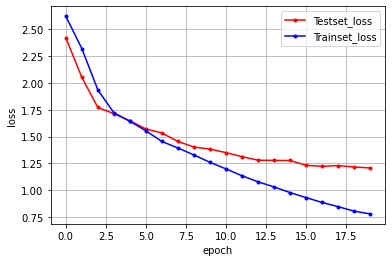

In [7]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()